# ASSIGNMENT 3


In [38]:
%config InlineBackend.figure_format = 'retina'


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/Users/sad8b/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [20]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# a. Set a seed (to ensure work reproducibility) and take a random sample of 25 observations and find the mean Glucose and highest Glucose values of this sample and compare these statistics with the population statistics of the same variable. You should use charts for this comparison.    

In [ ]:
np.random.seed(999)
df = pd.read_csv('diabetes.csv') # Loading the dataset
sample_df = df.sample(n=25, random_state=999) # Randomly sampling 25 rows from the diabetes dataset
sample_df


In [32]:

sample_mean = sample_df['Glucose'].mean()
print("The mean glucose value of the sample is: ", sample_mean)


The mean glucose value of the sample is:  118.76


In [34]:
sample_max = sample_df['Glucose'].max()
print("The highest glucose value of the sample is: ", sample_max)

The highest glucose value of the sample is:  164


In [35]:
population_mean = df['Glucose'].mean()
print("The mean glucose value of the population is: ", population_mean)

The mean glucose value of the population is:  120.89453125


In [30]:
population_max = df['Glucose'].max()
print("The highest glucose value in the population is:", population_max)

The highest glucose value in the population is: 199


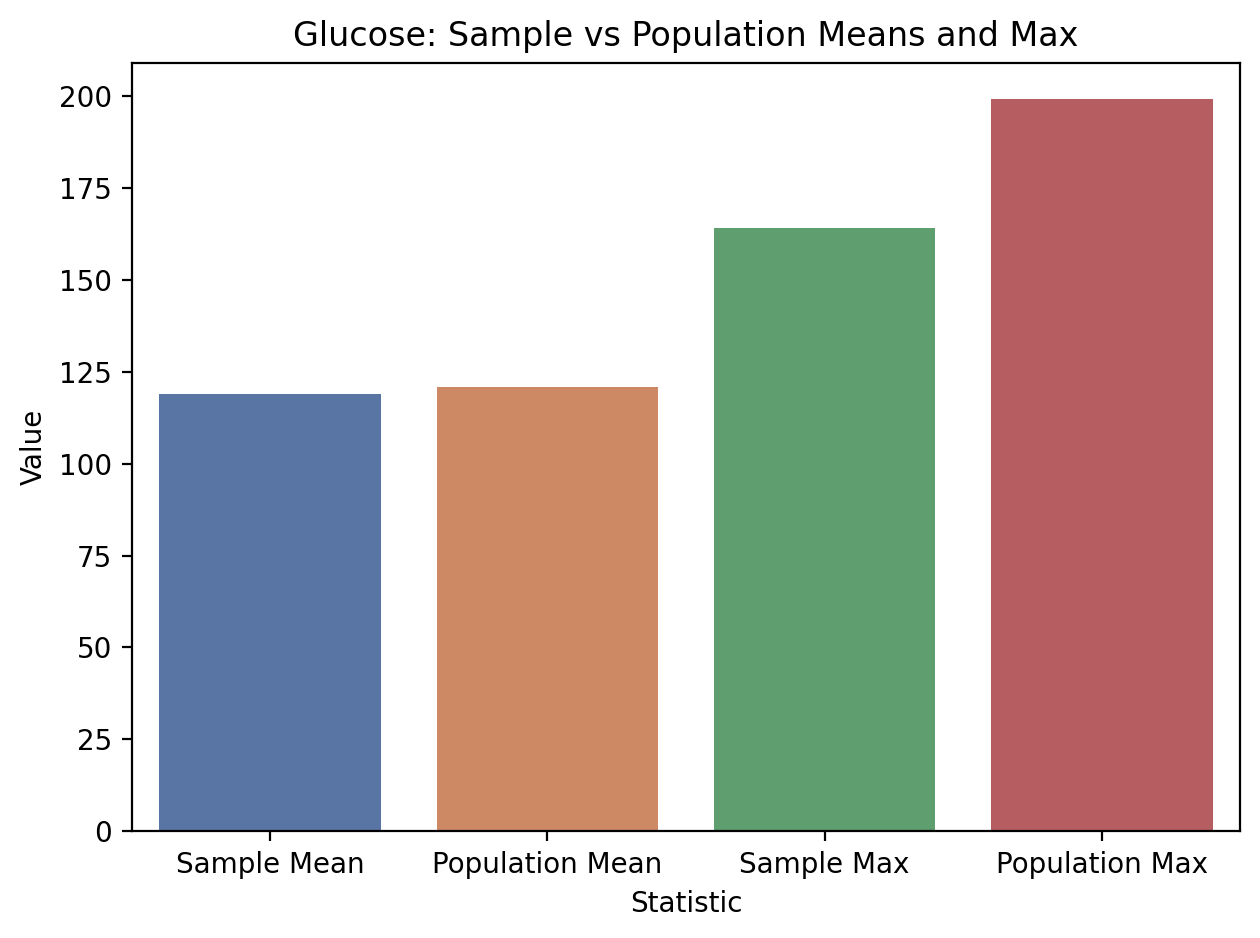

In [42]:

comp = pd.DataFrame({
    'Statistic': ['Sample Mean', 'Population Mean', 'Sample Max', 'Population Max'],
    'Value': [sample_mean, population_mean, sample_max, population_max]
})

sns.barplot(data=comp, x='Statistic', y='Value', palette=['#4c72b0', '#dd8452', '#55a868', '#c44e52'])
plt.title('Glucose: Sample vs Population Means and Max')
plt.tight_layout()
plt.show()

# b. Find the 98th percentile of BMI of your sample and the population and compare the results using charts

The 98th percentile of the BMI in the sample is:  44.928
The 98th percentile of the BMI in the population is:  47.52599999999996


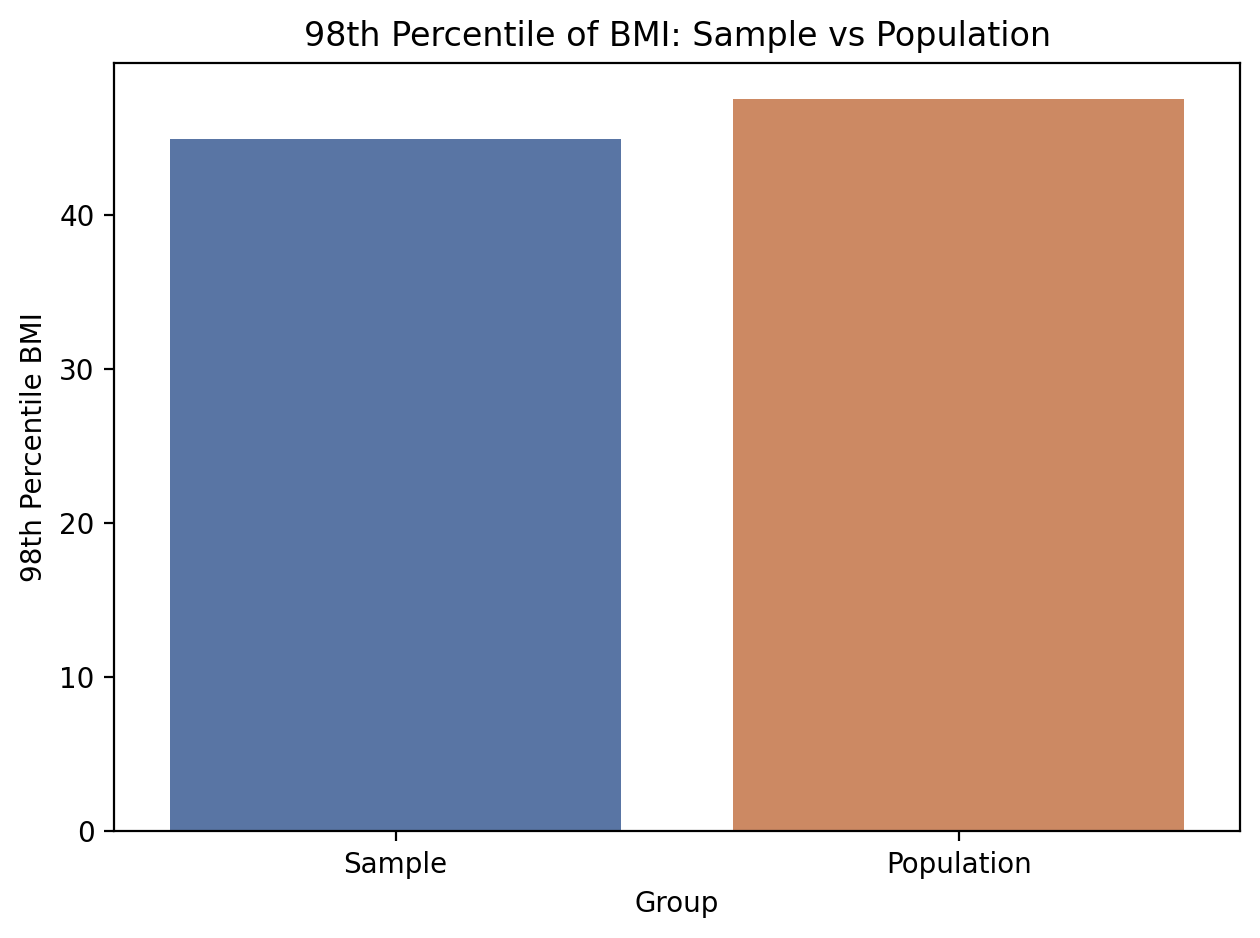

In [44]:
pop_bmi_98 = np.percentile(df['BMI'], 98)
sample_bmi_98 = np.percentile(sample_df['BMI'], 98)

print("The 98th percentile of the BMI in the sample is: ", sample_bmi_98)
print("The 98th percentile of the BMI in the population is: ", pop_bmi_98)
comp = pd.DataFrame({
    'Group': ['Sample', 'Population'],
    '98th Percentile BMI': [sample_bmi_98, pop_bmi_98]
})

sns.barplot(data=comp, x='Group', y='98th Percentile BMI', palette=['#4c72b0', '#dd8452'])
plt.title('98th Percentile of BMI: Sample vs Population')
plt.tight_layout()
plt.show()

# c. Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the population for the same variable. Again, you should create charts for this comparison. Report on your findings.


In [ ]:
boot_means = []
boot_stds = []
boot_percs = []

for _ in range(500):        
    
    bs = df['BloodPressure'].sample(n=150, replace=True) # Bootstrap sampling

    boot_means.append(bs.mean())
    boot_stds.append(bs.std(ddof=1))
    boot_percs.append(np.percentile(bs, 98))

boot_stds


In [54]:
avg_boot_mean = np.mean(boot_means)
avg_boot_std = np.mean(boot_stds)
avg_boot_perc = np.mean(boot_percs)

avg_boot_mean

69.11055999999999

In [55]:
pop_mean_bp = df['BloodPressure'].mean()
pop_std_bp = df['BloodPressure'].std(ddof=1)
pop_perc_bp = np.percentile(df['BloodPressure'], 98)

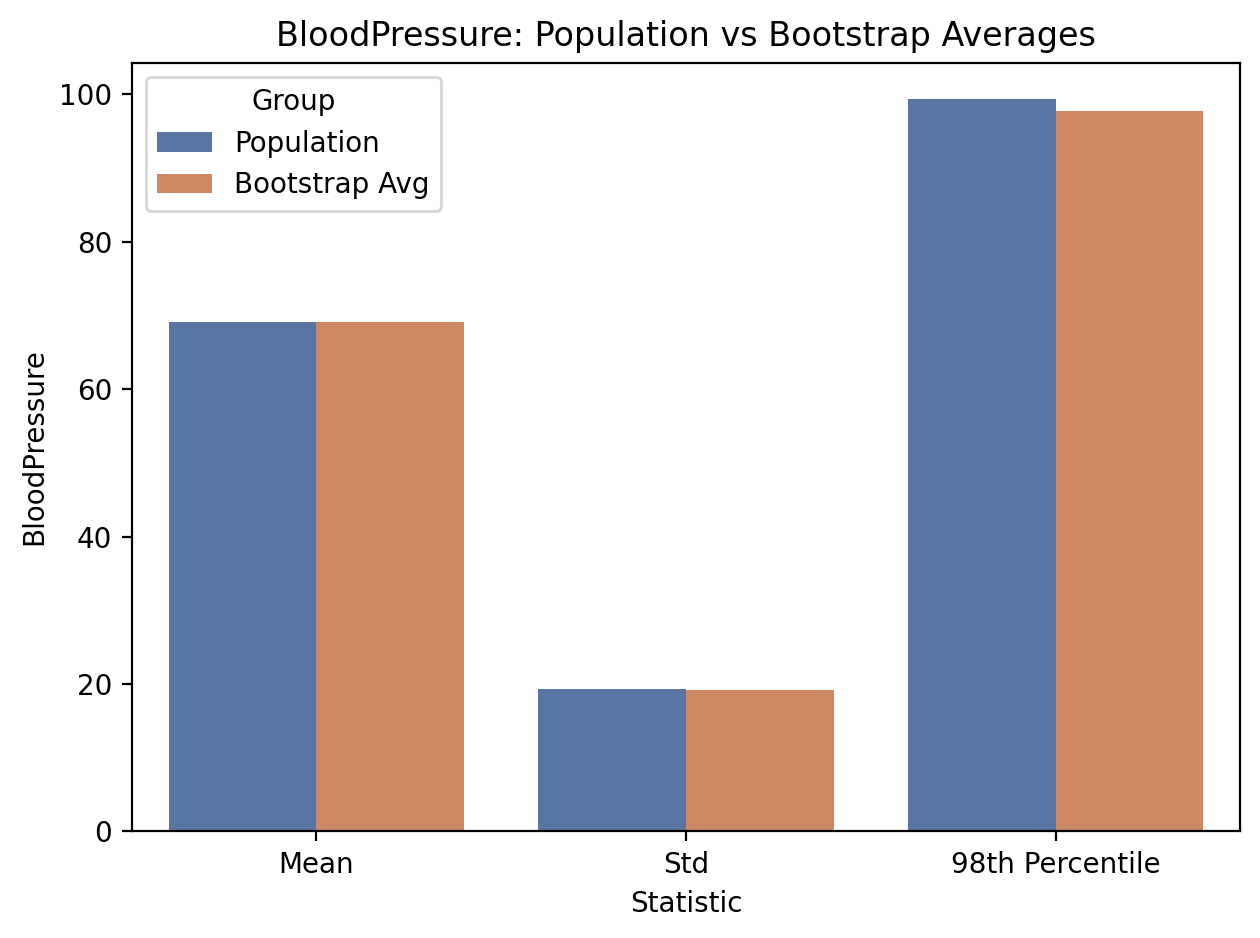

In [59]:
comp = pd.DataFrame({
    'Statistic': ['Mean', 'Std', '98th Percentile'],
    'Population': [pop_mean_bp, pop_std_bp, pop_perc_bp],
    'Bootstrap Avg': [avg_boot_mean, avg_boot_std, avg_boot_perc]
})

melted = comp.melt(id_vars='Statistic', var_name='Group', value_name='BloodPressure')

sns.barplot(data=melted, x='Statistic', y='BloodPressure', hue='Group', palette=['#4c72b0', '#dd8452'])
plt.title('BloodPressure: Population vs Bootstrap Averages')
plt.tight_layout()
plt.show()

This bar chart compares three statistical measures—Mean, Standard Deviation (Std), and 98th Percentile of the BloodPressure variable from the diabetes dataset between the population and the average of 500 bootstrap samples (each with 150 observations). The bootstrap averages closely approximate the population statistics, validating the reliability of bootstrap resampling for this dataset.